# Calling R, Python and C++ from Julia


- Douglas Bates
- U. of Wisconsin - Madison
- github: dmbates


## In 2012 I started using Julia

### Good things
- What Viral said: multiple dispatch, JIT method compilation, extensible type system, interesting language constructs.

### Bad things
- Many things I knew how to do in `R` were not available or needed to be relearned.
- Re-learning takes a while for things like data visualization systems
- `R` packages often provide data sets for illustration/experimentation. As a rule `Julia` packages don't.

## The `RCall` package (JuliaStats/RCall.jl)

- Julia has the `ccall` function. Steven Johnson had written `PyCall`. Avik created `JavaCall`
- So I started writing `RCall`.  Most of the recent work has been done by Randy Lai and Simon Byrne.
- Basic approach
    - Create Julia immutables to mirror `R`'s `SEXPREC` struct (see [`types.jl`](https://github.com/JuliaStats/RCall.jl/blob/master/src/types.jl) )
    - Locate and dlopen `libR` (see [`setup.jl`](https://github.com/JuliaStats/RCall.jl/blob/master/src/setup.jl) )
    - Start an embedded `R` process
    - Call `R`'s API
- Functions of interest are `reval`, `rcall`, `rcopy`, etc.

In [1]:
using RCall  # make the package available
whos(RCall)

                        @R_str   2163 bytes  Function
                         @rget   1576 bytes  Function
                      @rimport   1860 bytes  Function
                     @rlibrary   1296 bytes  Function
                         @rput   1542 bytes  Function
                       @rusing    452 bytes  Function
                      @var_str    259 bytes  Function
                       CharSxp    136 bytes  DataType
                       ClosSxp    148 bytes  DataType
                       CplxSxp    136 bytes  DataType
                        IntSxp    136 bytes  DataType
                        LglSxp    136 bytes  DataType
                        NilSxp    112 bytes  DataType
                         RCall    566 KB     Module
                       RObject    168 bytes  DataType
                       RealSxp    136 bytes  DataType
                        StrSxp    136 bytes  DataType
                           Sxp     92 bytes  DataType
                         anyNA

In [2]:
?rcall

search: rcall RCall remotecall remotecall_wait remotecall_fetch UniformScaling



Evaluate a function in the global environment. The first argument corresponds to the function to be called. It can be either a FunctionSxp type, a SymSxp or a Symbol.


In [3]:
?rcopy

search: rcopy precompile __precompile__ readchomp ProcessGroup



Evaluate and convert the result of a string as an R expression.

`rcopy` copies the contents of an R object into a corresponding canonical Julia type.

`rcopy(T,p)` converts a pointer `p` to a Sxp object to a native Julia object of type T.

`rcopy(p)` performs a default conversion.


In [4]:
mtcars = rcopy("mtcars")

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,21.0,6.0,160.0,110.0,3.9,2.62,16.46,0.0,1.0,4.0,4.0
2,21.0,6.0,160.0,110.0,3.9,2.875,17.02,0.0,1.0,4.0,4.0
3,22.8,4.0,108.0,93.0,3.85,2.32,18.61,1.0,1.0,4.0,1.0
4,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
5,18.7,8.0,360.0,175.0,3.15,3.44,17.02,0.0,0.0,3.0,2.0
6,18.1,6.0,225.0,105.0,2.76,3.46,20.22,1.0,0.0,3.0,1.0
7,14.3,8.0,360.0,245.0,3.21,3.57,15.84,0.0,0.0,3.0,4.0
8,24.4,4.0,146.7,62.0,3.69,3.19,20.0,1.0,0.0,4.0,2.0
9,22.8,4.0,140.8,95.0,3.92,3.15,22.9,1.0,0.0,4.0,2.0
10,19.2,6.0,167.6,123.0,3.92,3.44,18.3,1.0,0.0,4.0,4.0


## A simpler interface
- the character `R` followed by a string evaluates the string as an `R` expression.  The behavior is defined in `@R_str`. See [`rstr.jl`](https://github.com/JuliaStats/RCall.jl/blob/master/src/rstr.jl).
- Julia allows multiline strings using triple quotes
- string interpolation of Julia objects is allowed using `$`, only when it is not used as valid `R` syntax.


In [5]:
R"""
suppressMessages(library(lme4))
fm1 <- lmer(Yield ~ 1 + (1 | Batch), Dyestuff, REML = FALSE)
getME(fm1, "theta")
"""[1]

0.7525806925786059

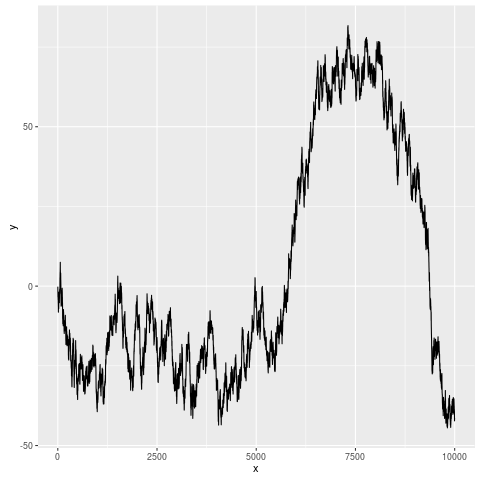

RCall.RObject{RCall.VecSxp}


In [6]:
using DataFrames
brownian(N) = DataFrame(x = 1:N, y = cumsum(randn(N)))
srand(1234321)  # set random number seed
br = brownian(10_000);
R"""
suppressMessages(library(ggplot2))
ggplot($br, aes(x = x, y = y)) + geom_line()
"""

## An even simpler interface

- Most of base Julia, including the REPL, is written in Julia
- The REPL allows for different, user-extensible, modes: julia, shell, help, ..
- Modes can be switched by the first character you type at the prompt (`?` for help; `;` for shell)
- `RCall` adds an R REPL mode (magic char is `$`).  `Cxx` adds a `C++` REPL mode (magic is `<`).  

## RCall summary

- There is no "glue" code written in a compiled language.  The whole package is written in Julia.
- It is feasible to emulate the internal R structures in Julia.  The other direction would be very difficult.
- `ccall`, `cglobal`, `cfunction`, `Libdl.dlopen` allow low-level access to a C API.
- String macros and REPL modes allow for a familiar interface.

## PyCall (stevengj/PyCall.jl)

- the `@pyimport` macro functions like `import` in Python.

In [7]:
using PyCall
@pyimport numpy as np
@pyimport pandas as pd
@pyimport feather

In [8]:
whos(pd)

                   Categorical      8 bytes  PyCall.PyObject
              CategoricalIndex      8 bytes  PyCall.PyObject
                     DataFrame      8 bytes  PyCall.PyObject
                    DateOffset      8 bytes  PyCall.PyObject
                 DatetimeIndex      8 bytes  PyCall.PyObject
                     ExcelFile      8 bytes  PyCall.PyObject
                   ExcelWriter      8 bytes  PyCall.PyObject
                          Expr      8 bytes  PyCall.PyObject
                  Float64Index      8 bytes  PyCall.PyObject
                       Grouper      8 bytes  PyCall.PyObject
                      HDFStore      8 bytes  PyCall.PyObject
                         Index      8 bytes  PyCall.PyObject
                    IndexSlice      8 bytes  PyCall.PyObject
                    Int64Index      8 bytes  PyCall.PyObject
                    MultiIndex      8 bytes  PyCall.PyObject
                           NaT      8 bytes  PyCall.PyObject
                        

In [9]:
function brown(N::Number)
    v = zeros(N + 1)
    for i in 1:N
        v[i + 1] = v[i] + randn()
    end
    v
end
        

brown (generic function with 1 method)

In [10]:
df = pd.DataFrame(Dict("br1" => pd.Series(brown(10_000)), "br2" => pd.Series(brown(10_000))))

,br1,br2
0,0.000000,0.000000
1,-0.773834,-0.006075
2,-0.537581,-0.281177
3,0.070239,0.989620
4,0.913922,0.272461
5,0.783253,0.943957
6,1.847161,0.796048
7,0.448132,1.478668
8,-2.358731,0.106409
9,-3.037559,-0.322209


In [11]:
feather.write_dataframe(df, "/tmp/br.feather")

In [12]:
R"""
library(feather)
read_feather("/tmp/br.feather")
"""

RCall.RObject{RCall.VecSxp}
Source: local data frame [10,001 x 2]

           br1          br2
         <dbl>        <dbl>
1   0.00000000  0.000000000
2  -0.77383429 -0.006074936
3  -0.53758071 -0.281177366
4   0.07023901  0.989619762
5   0.91392200  0.272461480
6   0.78325339  0.943957326
7   1.84716072  0.796047645
8   0.44813220  1.478668055
9  -2.35873065  0.106408928
10 -3.03755867 -0.322209156
..         ...          ...
